In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import baostock as bs
lg = bs.login()
filename = "sh.000905"
rs = bs.query_history_k_data_plus(filename,
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2018-01-01',
    end_date='2022-01-01',
    frequency="d", adjustflag="3")
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 结果集输出到csv文件 ####
result.to_csv(filename+".csv", index=False)
print(result)
bs.logout()

login success!
           date       code       open       high        low      close  \
0    2018-01-02  sh.000905  6263.1500  6332.6080  6258.1560  6332.2260   
1    2018-01-03  sh.000905  6331.7190  6391.9790  6324.2600  6388.2530   
2    2018-01-04  sh.000905  6380.2660  6418.2560  6375.5130  6417.5350   
3    2018-01-05  sh.000905  6414.7650  6435.8540  6397.2920  6417.2530   
4    2018-01-08  sh.000905  6413.8730  6446.7870  6393.8810  6446.1810   
..          ...        ...        ...        ...        ...        ...   
968  2021-12-27  sh.000905  7269.3700  7323.8760  7255.7163  7272.7493   
969  2021-12-28  sh.000905  7281.0041  7290.5389  7240.9278  7286.0336   
970  2021-12-29  sh.000905  7275.6736  7290.8597  7242.3024  7247.7741   
971  2021-12-30  sh.000905  7246.0313  7324.4981  7244.2221  7310.9600   
972  2021-12-31  sh.000905  7320.9363  7368.1297  7317.7047  7359.4024   

      preclose       volume             amount adjustflag      turn  \
0    6250.8200   73032235

In [17]:
import numpy as np


def get_peaks_troughs(h, rangesize):
    peaks = list()
    troughs = list()
    S = 1
    for x in range(1, len(h) - 5):
        if S == 0:
            if h[x] > 0.2*(h[x + 1]+h[x + 2]+h[x + 3]+h[x + 4]+h[x + 5]):
                S = 1  ## down
            else:
                S = 2  ## up
        elif S == 1:
            if h[x] < 0.2*(h[x + 1]+h[x + 2]+h[x + 3]+h[x + 4]+h[x + 5]):
                S = 2
                ## from down to up
                if len(troughs):
                    ## check if need merge
                    (prev_x, prev_trough) = troughs[-1]
                    if x - prev_x < rangesize:
                        if prev_trough > h[x]:
                            troughs[-1] = (x, h[x])
                    else:
                        #if(len(peaks) and h[x]<peaks[-1]):
                        troughs.append((x, h[x]))
                else:

                    troughs.append((x, h[x]))


        elif S == 2:
            if h[x] > 0.2*(h[x + 1]+h[x + 2]+h[x + 3]+h[x + 4]+h[x + 5]):
                S = 1
                ## from up to down
                if len(peaks):
                    prev_x, prev_peak = peaks[-1]
                    if x - prev_x < rangesize:
                        if prev_peak < h[x]:
                            peaks[-1] = (x, h[x])
                    else:
                        #if(len(troughs) and h[x]>troughs[-1]):
                        peaks.append((x, h[x]))
                else:
                    peaks.append((x, h[x]))

    return peaks, troughs

In [18]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import baostock as bs

lg = bs.login()
filename = "sh.600519"
rs = bs.query_history_k_data_plus(filename,
                                  "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
                                  start_date='2020-01-01',
                                  end_date='2021-06-01',
                                  frequency="d", adjustflag="3")
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
bs.logout()
h=result['close'].values.astype(float)
peaks, troughs = get_peaks_troughs(h, 10)

login success!
logout success!


In [19]:
print(peaks, troughs)

[(6, 1112.5), (22, 1098.0), (39, 1171.0), (101, 1425.0), (124, 1713.85), (138, 1680.0), (150, 1690.0), (160, 1786.5), (184, 1750.61), (204, 1742.57), (214, 1790.21), (235, 1881.0), (258, 2175.0), (269, 2456.43), (286, 2048.0), (302, 2162.0), (316, 2108.94), (329, 2057.96)] [(1, 1078.56), (16, 1003.92), (32, 1074.81), (48, 1007.99), (91, 1328.2), (107, 1383.0), (134, 1595.3), (144, 1631.0), (166, 1711.4), (178, 1629.32), (194, 1643.0), (208, 1705.0), (227, 1832.9), (253, 2063.0), (283, 1960.0), (293, 1989.99), (306, 2020.0), (323, 1903.0)]


In [20]:
result.loc[:, 'label'] = 0
result['label'].astype(float)
for x, y in peaks:
    result['label'][x]=-1
for x, y in troughs:
    result['label'][x]=1

/var/folders/9h/zxjknhr917q09gsp6bbyrkqw0000gn/T/ipykernel_35111/3748005191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['label'][x]=-1
/var/folders/9h/zxjknhr917q09gsp6bbyrkqw0000gn/T/ipykernel_35111/3748005191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['label'][x]=1


In [21]:
s=1
for i in range(len(result['label'].values)):
    if result['label'].values[i]==0:
        pass
    if result['label'].values[i]==1 and s==0:
        result['label'].values[i]=0
    elif result['label'].values[i]==-1 and s==1:
        result['label'].values[i]=0
    elif result['label'].values[i]==-1 and s==0:
        s=1
    elif result['label'].values[i]==1 and s==1:
        s=0




In [22]:
result['label']

0      0
1      1
2      0
3      0
4      0
      ..
336    0
337    0
338    0
339    0
340    0
Name: label, Length: 341, dtype: int64

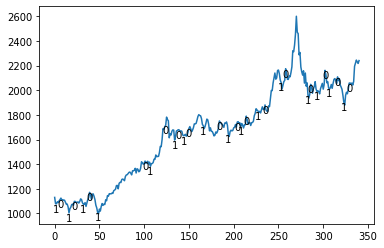

In [23]:
h=result['close'].values.astype(float)
peaks, troughs = get_peaks_troughs(h, 10)
plt.plot(np.arange(len(h)), h)
for i in range(len(result['label'].values)):
    if result['label'].values[i]==1:
        plt.text(i, h[i], 1, fontsize=10, verticalalignment="top", horizontalalignment="center")
    elif result['label'].values[i]==-1:
        plt.text(i, h[i], 0, fontsize=10, verticalalignment="top", horizontalalignment="center")

plt.show()

In [24]:
result.to_csv('peakthough.csv')